In [1]:
#import required libraries
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import MaxPooling2D, Activation, Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
%matplotlib inline

In [2]:
#Obtaining data path
import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/DL_projects/Pet Classification'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/DL_projects/Pet Classification/train/cats/8.jpg
/content/drive/My Drive/DL_projects/Pet Classification/train/cats/7.jpg
/content/drive/My Drive/DL_projects/Pet Classification/train/cats/9.jpg
/content/drive/My Drive/DL_projects/Pet Classification/train/cats/11.jpg
/content/drive/My Drive/DL_projects/Pet Classification/train/cats/17.jpg
/content/drive/My Drive/DL_projects/Pet Classification/train/cats/6.jpg
/content/drive/My Drive/DL_projects/Pet Classification/train/cats/1.jpg
/content/drive/My Drive/DL_projects/Pet Classification/train/cats/13.jpg
/content/drive/My Drive/DL_projects/Pet Classification/train/cats/14.jpg
/content/drive/My Drive/DL_projects/Pet Classification/train/cats/19.jpg
/content/drive/My Drive/DL_projects/Pet Classification/train/cats/15.jpg
/content/drive/My Drive/DL_projects/Pet Classification/train/cats/10.jpg
/content/drive/My Drive/DL_projects/Pet Classification/train/cats/18.jpg
/content/drive/My Drive/DL_projects/Pet Classification/t

In [3]:
#Getting data patha with categories
Directory = "/content/drive/My Drive/DL_projects/Pet Classification/train"
Categories =['cats','dogs']

0
(346, 461, 3)
(150, 150, 3)
(500, 495, 3)
(150, 150, 3)
(426, 320, 3)
(150, 150, 3)
(410, 432, 3)
(150, 150, 3)
(375, 500, 3)
(150, 150, 3)
(304, 400, 3)
(150, 150, 3)
(281, 300, 3)
(150, 150, 3)
(315, 500, 3)
(150, 150, 3)
(268, 320, 3)
(150, 150, 3)
(224, 320, 3)
(150, 150, 3)
(353, 406, 3)
(150, 150, 3)
(500, 489, 3)
(150, 150, 3)
(375, 500, 3)
(150, 150, 3)
(225, 300, 3)
(150, 150, 3)
(375, 500, 3)
(150, 150, 3)
(259, 448, 3)
(150, 150, 3)
(415, 500, 3)
(150, 150, 3)
(375, 500, 3)
(150, 150, 3)
(144, 176, 3)
(150, 150, 3)
(397, 312, 3)
(150, 150, 3)
1
(375, 500, 3)
(150, 150, 3)
(381, 500, 3)
(150, 150, 3)
(336, 272, 3)
(150, 150, 3)
(387, 500, 3)
(150, 150, 3)
(348, 216, 3)
(150, 150, 3)
(500, 327, 3)
(150, 150, 3)
(102, 135, 3)
(150, 150, 3)
(162, 98, 3)
(150, 150, 3)
(225, 300, 3)
(150, 150, 3)
(333, 500, 3)
(150, 150, 3)
(500, 369, 3)
(150, 150, 3)
(293, 269, 3)
(150, 150, 3)
(199, 188, 3)
(150, 150, 3)
(375, 500, 3)
(150, 150, 3)
(500, 470, 3)
(150, 150, 3)
(264, 300, 3)
(15

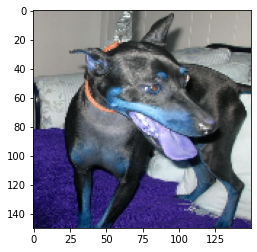

In [4]:
img_size =150
data=[]

count=0
for category in Categories:
    folder =os.path.join(Directory, category)
    label = Categories.index(category)
    print(label)
    for img in os.listdir(folder):
        img_pth = os.path.join(folder,img)
        #print(img_pth)
        img_arr=cv2.imread(img_pth)
        print(img_arr.shape)
        img_arr = cv2.resize(img_arr,(img_size, img_size)) #resizing the image
        print(img_arr.shape)
        plt.imshow(img_arr)
        data.append([img_arr, label])
        count=1+count
        if(count==50):
            break

In [5]:
#Splitting into X and y
X =[]
y =[]

for feature, label in data:
    X.append(feature)
    y.append(label)
    
X = np.array(X)
y = np.array(y)

In [6]:
#Scaling images
X =X/255

In [7]:
#checking shape of X
X.shape

(40, 150, 150, 3)

In [8]:
#Building CNN model
model = Sequential()

model.add(Dense(128, input_shape=X.shape[1:],activation='relu'))

model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D((2,2)))             

model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D((2,2)))         

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))

In [10]:
#compilation
model.compile(optimizer ='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
#training data
model.fit(X, y, batch_size=10,epochs=100,validation_split= 0.2)


Epoch 1/100
4/4 [==============================] - 0s 85ms/step - loss: 0.0733 - accuracy: 0.9688 - val_loss: 5.8725 - val_accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 57ms/step - loss: 0.1960 - accuracy: 0.9688 - val_loss: 6.8742 - val_accuracy: 0.1250
Epoch 3/100
4/4 [==============================] - 0s 57ms/step - loss: 0.0244 - accuracy: 1.0000 - val_loss: 9.5922 - val_accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 57ms/step - loss: 0.0669 - accuracy: 0.9688 - val_loss: 8.0577 - val_accuracy: 0.1250
Epoch 5/100
4/4 [==============================] - 0s 58ms/step - loss: 0.0201 - accuracy: 1.0000 - val_loss: 7.3026 - val_accuracy: 0.1250
Epoch 6/100
4/4 [==============================] - 0s 58ms/step - loss: 0.0278 - accuracy: 1.0000 - val_loss: 7.7420 - val_accuracy: 0.1250
Epoch 7/100
4/4 [==============================] - 0s 57ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 8.8112 - val_accuracy: 0.0000e+00
Epoch 8/

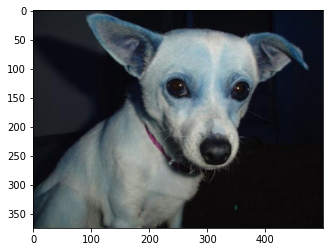

[[1]]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [19]:
#Predicting a dog
image = '/content/drive/My Drive/DL_projects/Pet Classification/test/dogs/104.jpg'
img = cv2.imread(image)
plt.imshow(img)
plt.show()
img = cv2.resize(img,(150,150))
img = np.reshape(img, (1, 150, 150, 3))
classes = model.predict_classes(img)
print(classes)

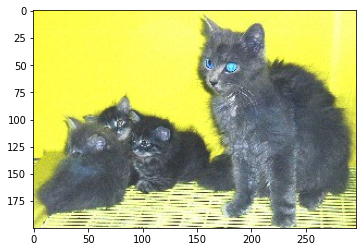

[[0]]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [20]:
#Predicting a cat
image = '/content/drive/My Drive/DL_projects/Pet Classification/test/cats/101.jpg'
img = cv2.imread(image)
plt.imshow(img)
plt.show()
img = cv2.resize(img,(150,150))
img = np.reshape(img, (1, 150, 150, 3))
classes = model.predict_classes(img)
print(classes)